In [16]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc

In [17]:
import warnings as ws
ws.defaultaction="ignore"

In [18]:
sns.set_style('whitegrid')

In [19]:
data=pd.read_excel("Medical Cost.xlsx")#loading data 

In [20]:
data.head(5)#first 5 rows of data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Handling Missing Values

In [21]:
#Let's check if the data has null values
data.isnull().sum()

age         0
sex         0
bmi         8
children    0
smoker      3
region      0
charges     0
dtype: int64

In [22]:
col=data.columns[data.isnull().any()]

In [23]:
nan_dict={}
for c in col:
    row=list(data[c][data[c].isnull()].index)
    nan_dict.update({c:row})

In [24]:
nan_dict

{'bmi': [14, 46, 63, 84, 102, 235, 262, 1324], 'smoker': [6, 15, 39]}

In [25]:
data['smoker'].value_counts()

no     1062
yes     273
Name: smoker, dtype: int64

In [26]:
data['smoker'].fillna(data['smoker'].mode()[0],inplace=True)#replacing smoker column missing values with mode

In [27]:
data.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377983,1.074018,12569.578844
male,38.917160,30.943789,1.115385,13956.751178


*Since mean bmi seem to be quite independent of gender, we try replace the missing bmi values with the mean bmi of entire sample data*

In [28]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [14]:
data.isnull().sum()#No Missing Values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Descriptive Statistics

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.664289,6.075506,15.9600,26.31500,30.495,34.595000,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [40]:
data['smoker'].value_counts()

no     1065
yes     273
Name: smoker, dtype: int64

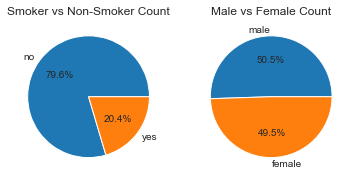

In [41]:
plt.subplot(1,2,1)
plt.pie(data['smoker'].value_counts(),labels=data['smoker'].value_counts().index,autopct="%.1f%%")
plt.title('Smoker vs Non-Smoker Count')

plt.subplot(1,2,2)
plt.pie(data['sex'].value_counts(),labels=data['sex'].value_counts().index,autopct="%.1f%%")
plt.title('Male vs Female Count')
plt.show()

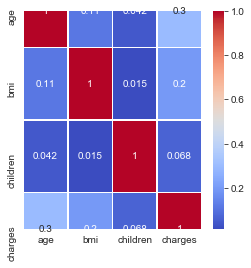

In [42]:
plt.figure(figsize=(4,4))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True,linewidths=0.5)
plt.show()


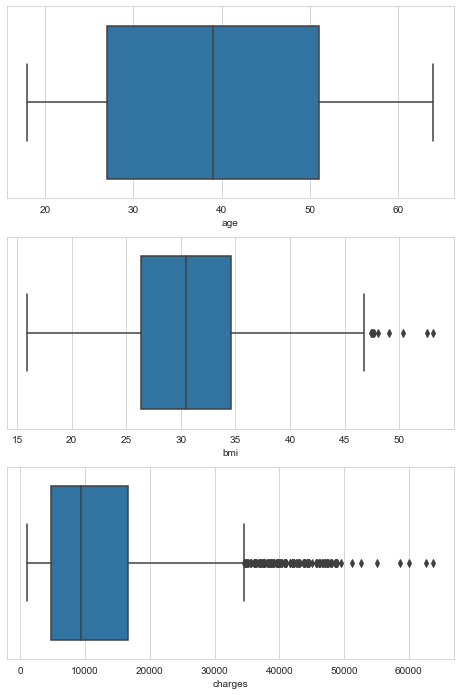

In [43]:
#Let's check distribution of our numerical variables
plt.figure(figsize=(8,12))
plt.subplot(3,1,1)
sns.boxplot(data['age'])
plt.subplot(3,1,2)
sns.boxplot(data['bmi'])
plt.subplot(3,1,3)
sns.boxplot(data['charges'])
plt.show()

In [44]:
sc.skew(data['charges'])
#Charges data is highly skewed

1.5141797118745743

*1. Age is uniformly distributed*
 
*2. Bmi has few extreme values*

*3. Charges data is highly skewed*

In [45]:
gender_smoker=pd.crosstab(data['sex'],data['smoker'])
gender_smoker

smoker,no,yes
sex,,
female,547,115
male,518,158


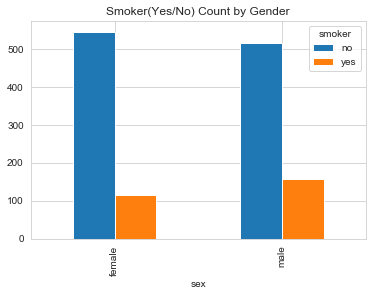

In [46]:
gender_smoker.plot(kind="bar")
plt.title("Smoker(Yes/No) Count by Gender")
plt.show()

  *More male smokers than female*

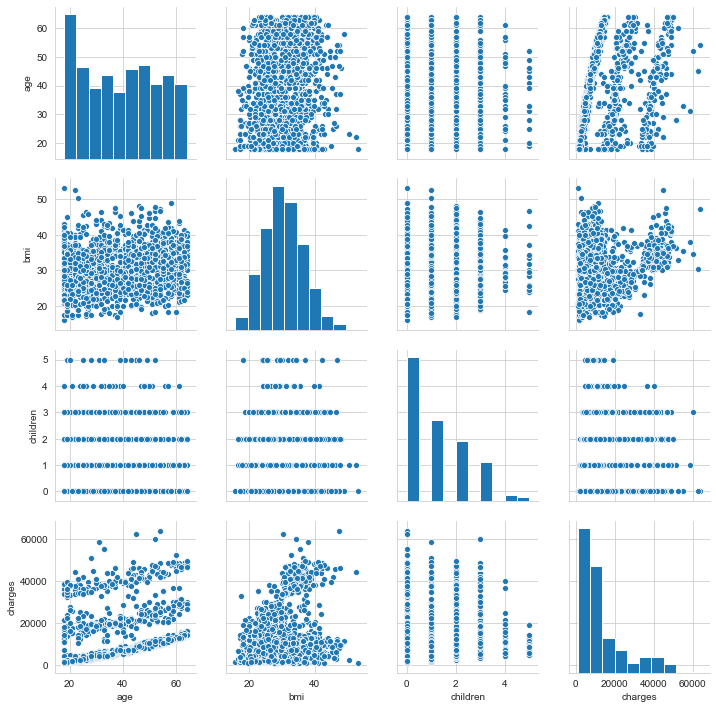

In [47]:
sns.pairplot(data)

In [48]:
#LET'S GRAB THE USEFUL ONES

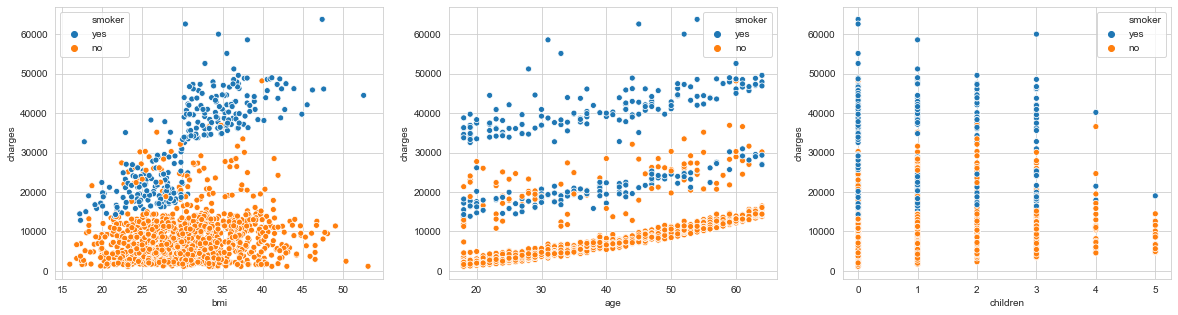

In [49]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(data['bmi'],data['charges'],hue=data.smoker)
plt.subplot(1,3,2)
sns.scatterplot(data['age'],data['charges'],hue=data.smoker)
plt.subplot(1,3,3)
sns.scatterplot(data['children'],data['charges'],hue=data.smoker)
plt.show()

*1.Clearly, smokers are paying much extra*

*2.Relation of bmi & charges is not prominent for non-smokers.
While for smokers, we do see a linear relationship which suggests: smokers with high bmi are definitely paying much more.*

*3. A linear relation of age & charges is prominent for non-smokers. Few datapoints are random & towards the higher charges, maybe due to bmi as additional factor*


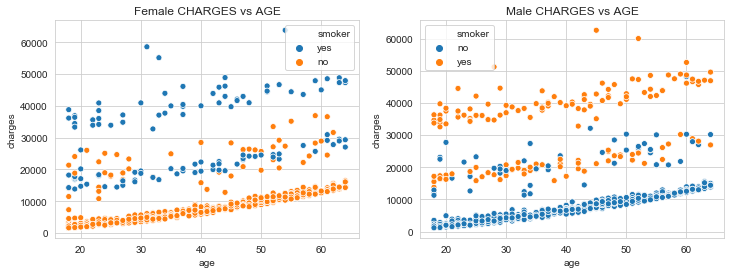

In [50]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(data[data["sex"]=="female"]['age'],data[data["sex"]=="female"]['charges'],hue=data[data["sex"]=="female"]["smoker"])
plt.title("Female CHARGES vs AGE")
plt.subplot(1,2,2)
sns.scatterplot(data[data["sex"]=="male"]['age'],data[data["sex"]=="male"]['charges'],hue=data[data["sex"]=="male"]["smoker"])
plt.title("Male CHARGES vs AGE")
plt.show()

*Male & Female CHARGES vs AGE has similar pattern*

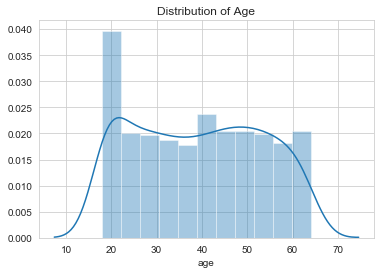

In [51]:
sns.distplot(data['age'])
plt.title("Distribution of Age")
plt.show()

In [52]:
young_smokers=data[(data['age']<20) & (data['smoker']=='yes')]
young_smokers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
57,18,male,31.680,2,yes,southeast,34303.16720
126,19,female,28.300,0,yes,southwest,17081.08000
157,18,male,25.175,0,yes,northeast,15518.18025
161,18,female,36.850,0,yes,southeast,36149.48350


*We have got smokers of age less than 20*

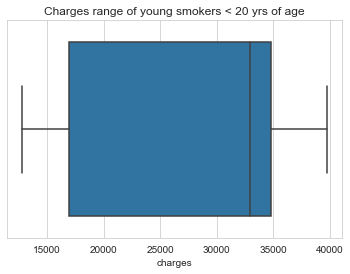

In [53]:
sns.boxplot(x=young_smokers.charges)
plt.title("Charges range of young smokers < 20 yrs of age")
plt.show()

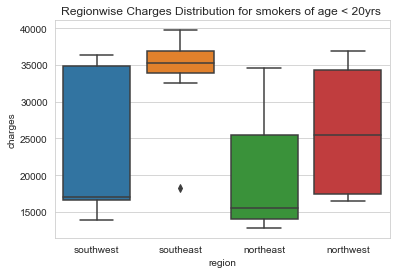

In [54]:
sns.boxplot(x=young_smokers['region'],y=young_smokers['charges'])
plt.title("Regionwise Charges Distribution for smokers of age < 20yrs ")
plt.show()

*In SOUTH EAST region, the young smokers are paying more as compared to other regions*

In [55]:
young_smokers.groupby(['region','smoker']).sum()['charges']

region     smoker
northeast  yes       141908.17685
northwest  yes       209197.04623
southeast  yes       270487.52840
southwest  yes       170114.20100
Name: charges, dtype: float64

In [56]:
young_smokers[young_smokers.smoker=='yes']['region'].value_counts()

southeast    8
northwest    8
southwest    7
northeast    7
Name: region, dtype: int64

*Let's go deep into REGION-CHARGES relation*

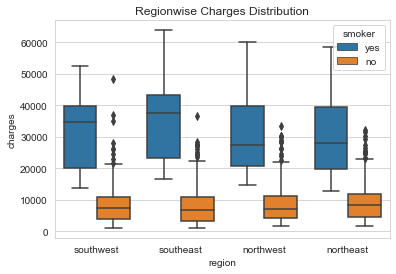

In [57]:
sns.boxplot(x=data['region'],y=data['charges'],hue=data.smoker)
plt.title("Regionwise Charges Distribution")
plt.show()

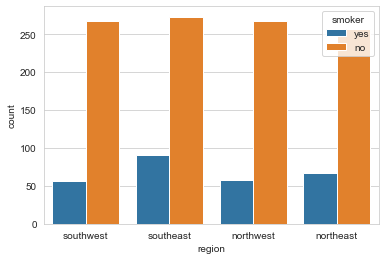

In [58]:
sns.countplot(data.region,hue=data.smoker)

In [59]:
higher_charge=data[data.charges>16639.912515]

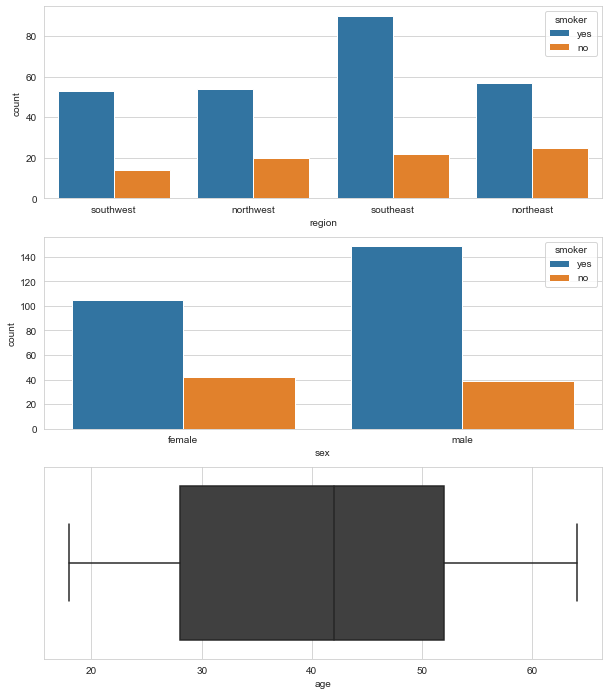

In [60]:
plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(higher_charge['region'],hue=higher_charge['smoker'])
plt.subplot(3,1,2)
sns.countplot(higher_charge['sex'],hue=higher_charge['smoker'])
plt.subplot(3,1,3)
sns.boxplot(higher_charge['age'],color="0.25")
plt.show()

*Charges Outliers are predominantly due to MALE-SOUTHEAST smokers* 

In [61]:
higher_charge.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
3,33,male,22.705,0,no,northwest,21984.47061


In [62]:
higher_charge['BMI Category']=pd.cut(higher_charge.bmi,bins=[0,18.5,25,30,53],labels=['Underweight','Healthy weight','Overweight','Obese']).values
higher_charge['Age Category']=pd.cut(higher_charge.age,bins=[18,30,42,54,64],labels=['Young Adult','Middle Adult','Senior Adult','Elder']).values
higher_charge

,age,sex,bmi,children,smoker,region,charges,BMI Category,Age Category
0,19,female,27.900000,0,yes,southwest,16884.92400,Overweight,Young Adult
3,33,male,22.705000,0,no,northwest,21984.47061,Healthy weight,Middle Adult
9,60,female,25.840000,0,no,northwest,28923.13692,Overweight,Elder
11,62,female,26.290000,0,yes,southeast,27808.72510,Overweight,Elder
14,27,male,30.664289,0,yes,southeast,39611.75770,Obese,Young Adult
...,...,...,...,...,...,...,...,...,...
1318,35,male,39.710000,4,no,northeast,19496.71917,Obese,Middle Adult
1321,62,male,26.695000,0,yes,northeast,28101.33305,Overweight,Elder
1323,42,female,40.370000,2,yes,southeast,43896.37630,Obese,Middle Adult
1328,23,female,24.225000,2,no,northeast,22395.74424,Healthy weight,Young Adult


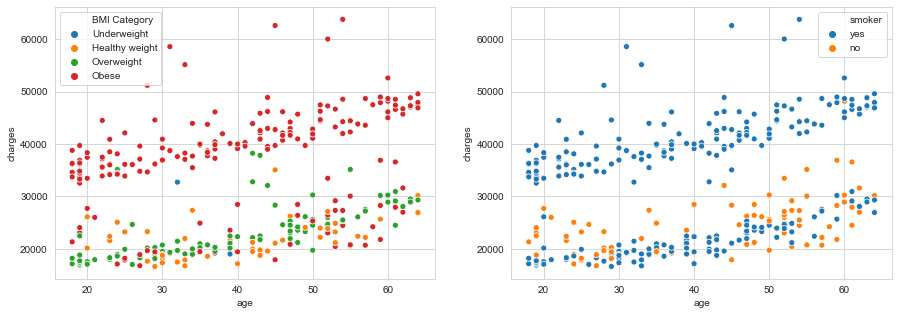

In [63]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(higher_charge['age'],higher_charge['charges'],hue=higher_charge['BMI Category'])
plt.subplot(1,2,2)
sns.scatterplot(higher_charge['age'],higher_charge['charges'],hue=higher_charge['smoker'])
plt.show()

*The higher charges data is pulled CLEARLY by OBESE i.e bmi>30 and they turned out to be smoker too(about>140), which is why they are paying high insurance*

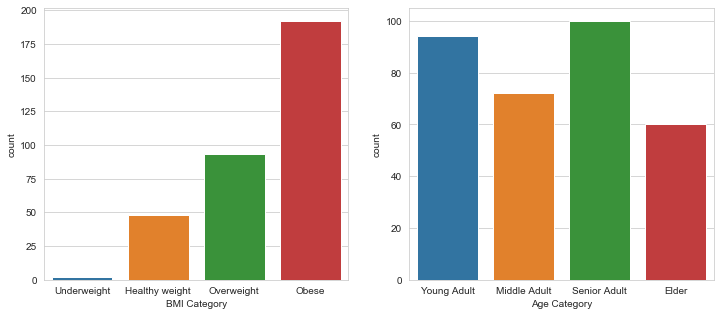

In [64]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(higher_charge['BMI Category'])
plt.subplot(1,2,2)
sns.countplot(higher_charge['Age Category'])
plt.show()

*Charges(Senior Adult> Middle Adult> Young Adult> Elder)*


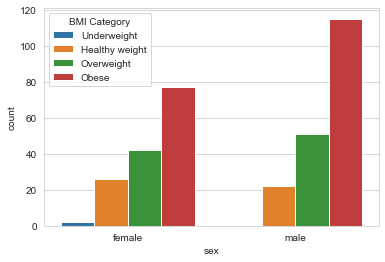

In [65]:
sns.countplot(higher_charge.sex,hue=higher_charge['BMI Category'])
plt.show()

*MALE OBESE is significantly higher than FEMALE*

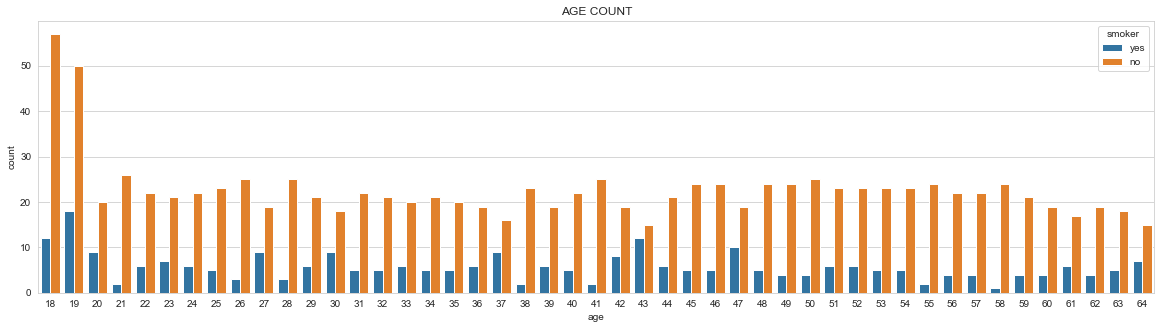

In [66]:
plt.figure(figsize=(20,5))
sns.countplot(data.age,hue=data.smoker)
plt.title("AGE COUNT")
plt.show()

*Maximum insurances are done in 18-19yrs of age*

# Hypothesis Testing

1. Effect of gender on smoking habits SEX-SMOKER

In [67]:
Ho="Gender has no effect on smoking habits"
Ha="Gender has effect on smoking habits"
chi,p_value,dof,expected=sc.chi2_contingency(gender_smoker)
if (p_value>0.05):
    print(Ho)
else:
    print(Ha)

Gender has effect on smoking habits


In [68]:
chi
#tabular_chi=3.84,thus reject Ho

7.051973467964843

In [69]:
gender_smoker#clearly we have more male smokers

smoker,no,yes
sex,,
female,547,115
male,518,158


2. Effect of region on Charges: REGION-CHARGES

In [70]:
Ho="Region has no effect on charges"
Ha="Region has effect on charges"
sample=data.sample(100)
charges=pd.cut(sample['charges'].sort_values(ascending=False),bins=15)
chi2,p,ddof,ex=sc.chi2_contingency(pd.crosstab(sample['region'],charges))

In [71]:
if (chi2<58.124):
    print(Ho)
else:
    print(Ha)

Region has no effect on charges


# 2 sample z-test

In [72]:
a=sample['charges'].mean()-sample['age'].mean()

In [73]:
b=np.sqrt(sample['charges'].var()-sample['age'].var())/10

In [74]:
z=a/b
z

9.042890081667203

In [75]:
sc.norm.cdf(z)

1.0

# Central Limit Theorm On CHARGES

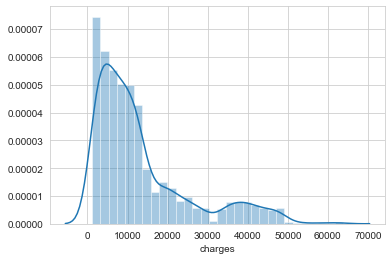

In [76]:
sns.distplot(data['charges'])


In [77]:
#Forming sample dataset randomly
import random
n=1000
ks=100
sample_dataset=[]
for i in range(0,n):
    sample_dataset.append(random.choices(data["charges"],k=ks))

In [78]:
#Calculating mean from means of sample sets: SAMPLE MEAN/s_mean
sample_means=[]
for i in sample_dataset:
    sample_means.append(np.mean(i))
s_mean=np.mean(sample_means)
s_mean

13261.801723297

In [79]:
#ACTUAL DATA MEAN
data['charges'].mean()

13270.422265141257

*Sample mean is almost equal to actual data mean*

In [80]:
s_var=np.var(sample_means)
s_std=np.std(sample_means)

In [81]:
s_var

1490440.9217663936

In [82]:
data['charges'].var()/(100)#Actual variance

1466523.721528548

In [83]:
s_std

1220.8361568066346

In [84]:
data['charges'].std()/np.sqrt(100)#Actual standard_deviation

1211.0011236693995

*Sample statistics is almost equal to population statistics for CHARGES*

# Data Preprocessing

In [85]:
data[data['charges']>16639.912515]
#this comprises of about 25% data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900000,0,yes,southwest,16884.92400
3,33,male,22.705000,0,no,northwest,21984.47061
9,60,female,25.840000,0,no,northwest,28923.13692
11,62,female,26.290000,0,yes,southeast,27808.72510
14,27,male,30.664289,0,yes,southeast,39611.75770
...,...,...,...,...,...,...,...
1318,35,male,39.710000,4,no,northeast,19496.71917
1321,62,male,26.695000,0,yes,northeast,28101.33305
1323,42,female,40.370000,2,yes,southeast,43896.37630
1328,23,female,24.225000,2,no,northeast,22395.74424


In [86]:
ub_bmi=34.595000+1.5*(34.595-26.315)#upperboundary_bmi

In [87]:
data['bmi']=np.where(data['bmi']>ub_bmi,ub_bmi,data['bmi'])#replacing outliers in bmi with ub_bmi

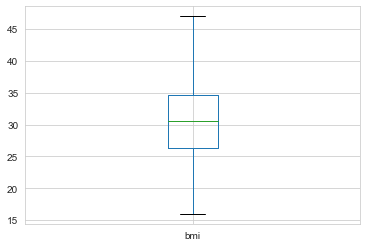

In [88]:
data['bmi'].plot(kind="box")
plt.show()#No outliers

In [89]:
data=pd.get_dummies(data)#encoding CATEGORICAL DATA

In [90]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


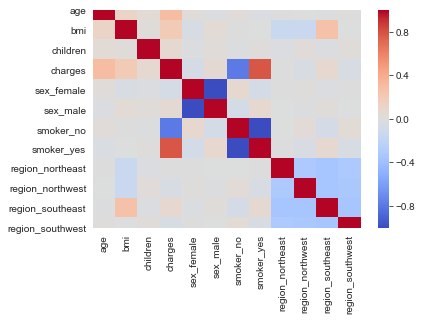

In [91]:
sns.heatmap(data.corr(),cmap="coolwarm")#High corr with smoker

# Linear Regression

In [112]:
#Splitting data into train & test
from sklearn.model_selection import train_test_split
x=data.drop(['charges'],axis=1)
y=data['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [113]:
#Training the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
#Predicting the values
y_pred=lr.predict(x_test)
y_pred_train=lr.predict(x_train)

In [115]:
from sklearn.metrics import mean_squared_error,r2_score#TO TEST THE MODEL

In [116]:
mean_squared_error(y_test,y_pred)

35701104.39245035

In [117]:
np.sqrt(35746516.8773678)

5978.839091108557

In [118]:
r2_score(y_test,y_pred)

0.7756481314299511

In [119]:
r2_score(y_train,y_pred_train)

0.7363514513150422